<a href="https://colab.research.google.com/github/kozyreviva/Data_Science/blob/main/Fp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
Привет, Иван!<br>
А вот и модельная часть от тебя.  Пошёл вниз.

<div class="alert alert-info"> <b>Комментарий студента. Код: </b> 
Привет Николай! </div>

 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ ТИМЛИДА</u></b>

Здравствуй Иван!<br>
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!
        
Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

# Промышленность — задача проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> <u>КОММЕНТАРИЙ ТИМЛИДА</u>
</font>
<font color='green'><br>
ок, это хороший тон - дать описание проблематики.

## Работа с данными

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Загрузка библиотек
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold

###Загрузка датасета

Загрузим необходимые датасеты.

In [ ]:
#Загрузка и сохранение таблиц
try:
  df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
  df_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
  df_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
  df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
  df_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
except:
  df_arc = pd.read_csv('data_arc.csv')
  df_bulk = pd.read_csv('data_bulk.csv')
  df_gas = pd.read_csv('data_gas.csv')
  df_temp = pd.read_csv('data_temp.csv')
  df_wire = pd.read_csv('data_wire.csv')

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ОК, данные на базе)</p>
</div>

Выведем таблицы и информацию о них.

In [ ]:
#Вывод таблицы
df_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [ ]:
#вывод информации
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [ ]:
#Вывод талблицы
df_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [ ]:
#Вывод информации
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [ ]:
#Вывод таблицы
df_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [ ]:
#Вывод информации
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [ ]:
#Вывод таблицы
df_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


In [ ]:
#Вывод информации
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [ ]:
#Вывод таблицы
df_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Вывод информации
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


### Первичные выводы


Загруженные датасеты представляют собой отдельные категории данных из процесса обработки металла. Видна связь между таблицами. 

**Исходя из таблиц можно выделить некоторые моменты:**

* В каждой таблице есть признак 'key' который связывает все датасеты. По нему можно производить объединение таблиц.  
* Некоторые таблицы имеют неправильный регистр в названиях столбцов. 
* В данных имеютстя пропуски которые следует удалить или заполнить.
* Некоторые данные следует привести к нужному типу.

Дальнейшие результаты наблюдений будут доступны в ходе подробного рассмотрения таблиц.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Чёткий первичный анализ на месте, ОК!</p>
</div>

### Анализ данных

#### Обработа ошибок

Изменим язык названия столбцов и приведём к змеиному регистру.

In [ ]:
#Изменение названий столбцов
df_arc.rename(columns = {'Начало нагрева дугой' : 'start_heat',
                         'Конец нагрева дугой':'end_heat',
                         'Активная мощность':'active_power',
                         'Реактивная мощность':'reactive_power'},inplace = True)
df_gas.rename(columns = {'Газ 1':'gas'}, inplace = True)
df_temp.rename(columns = {'Время замера':'time_measure','Температура':'temperature'},inplace = True)

Проверим результат.

In [ ]:
#Вывод названий столбцов
print(df_arc.columns)
print(df_gas.columns)
print(df_temp.columns)

Index(['key', 'start_heat', 'end_heat', 'active_power', 'reactive_power'], dtype='object')
Index(['key', 'gas'], dtype='object')
Index(['key', 'time_measure', 'temperature'], dtype='object')


Напишем функцию замены на змеиный регистр и применим на датасеты.

In [ ]:
#Функция для змеиного регистра
def camel_to_snake(str, sep='_'):
    snake_register = ''
    for i in str:
        if i.isupper():
            snake_register += sep + i.lower()
        elif i == ' ':
          snake_register += sep
        else:
            snake_register += i
    return snake_register.lstrip(sep)

In [ ]:
#Изменение регистра столбцов
df_wire.columns = [camel_to_snake(x) for x in df_wire]
df_bulk.columns = [camel_to_snake(x) for x in df_bulk]

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ОК</p>
</div>

Проверим изменения.

In [ ]:
#Вывод названий столбцов
print(df_bulk.columns)
print(df_wire.columns)

Index(['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
       'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
       'bulk_13', 'bulk_14', 'bulk_15'],
      dtype='object')
Index(['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
       'wire_7', 'wire_8', 'wire_9'],
      dtype='object')


В таблицах есть данные даты и времени, изменим их на тип 'datetime'.

In [ ]:
#Изменение типа данных
df_arc['start_heat'] = pd.to_datetime(df_arc['start_heat'])
df_arc['end_heat'] = pd.to_datetime(df_arc['end_heat'])
df_temp['time_measure'] = pd.to_datetime(df_temp['time_measure'])

В 'df_bulk' и 'df_wire' имеются пропуски. Т.к. эти таблцы содержат данные с количеством добавления материала в ковш, то пропуски вероятнее всего обозначают что материал не добавлялся. Следовательно пропуски можно заполнить нулями.

In [ ]:
#Заполнение пропусков
df_bulk = df_bulk.fillna(0)
df_wire = df_wire.fillna(0)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>согласен</p>
</div>

Удалим пропуски в датасете с температурой, т.к. показатели тепературы для каждого ковша на каждом этапе разные, заполнение средним или медианой будет нарушением. Удалим ковши с хотябы одним пропуском.

In [ ]:
#Удаление пропусков
array_to_drop = df_temp.loc[df_temp['temperature'].isna(),'key'].unique()
df_temp = df_temp.query('key not in  @array_to_drop')

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Верно, если пропуск в целевой - нужно удалить. Но только всю партию!!!! Иначе сейчвас строки остались по этим партиям...</p>
</div>

<div class="alert alert-info"> <b>Комментарий студента: </b> 
тут немного исправил и удалил все ковши в пропусками.</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>ОК

#### Анализ

Для работы по построению моделей и анализу необходимы первые и последние значения температут. Данные в таблице 'df_temp' расположены по ключам в хронологичском порядке. Поэтому можно сгруппировать их по ключам и взять первые и последние значения.  
Данные о времени не нужны, а также не нужны данные с одинаковыми начальным и конечным значениями.  
Сохраним изменения в отдельную таблицу.

In [ ]:
#Группировка и получение значения с сохранением в отдельную переменную
temp_last = df_temp.groupby('key').last()
temp_first = df_temp.groupby('key').first()
#Удаление столбцов
temp_last.drop("time_measure",axis = 1, inplace = True)
temp_first.drop("time_measure",axis = 1,inplace = True)
#Изменение названия столбцов
temp_last.rename(columns = {'temperature':'last_temp'},inplace = True)
temp_first.rename(columns = {'temperature':'first_temp'},inplace = True)

#Объединение таблиц
first_last_temp = temp_first.merge(temp_last, on = 'key')
#Удаление строк с одинаковым значением
first_last_temp = first_last_temp.loc[first_last_temp['last_temp'] != first_last_temp['first_temp']]

Выведем получившийся датасет.

In [ ]:
#Вывод таблицы
first_last_temp.head()

,first_temp,last_temp
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ОК</p>
</div>

Возьмём данные из нового датасета и построим гистограмму распределения температур.

In [ ]:
#Построение гистограммы
fig = px.histogram(first_last_temp, marginal = 'box', title = 'Гистограмма начальных и конечных температур')
fig.show()

Проверим значения дисперсии.

In [ ]:
#Вывод дисперсии
first_last_temp.var()

first_temp    864.673582
last_temp     256.560132
dtype: float64

Из гистограммы видно что данные начальных и конечных температур в основном расположены в пределах  значений 1571 и 1605. При этом основное распределение конечных температур расположено в пределах значений 1587 и 1599. Разброс в показателях уменьшился, что показывает уменьшеная дисперсия.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>понятно</p>
</div>

Построим гистограмму распределения средних значений активной мощности для каждого ковша.

In [ ]:
#Построение гистограммы
fig = px.histogram(df_arc.groupby('key')['active_power'].mean(), marginal = 'box', title = 'Гистограмма активной мощности')
fig.show()

Потребляемая мощность для ковша в среднем составляет от 0.5 до 0.8.

Найдем суммарные значения для каждого цикла добавления проволки.  
Выведем таблцу.

In [ ]:
#Сохранение в переменную суммы столбцевых значений
wire_sum = pd.DataFrame(df_wire.sum().round().drop('key'))
#Вывод таблицы
wire_sum.head()


,0
wire_1,308237.0
wire_2,54573.0
wire_3,11937.0
wire_4,804.0
wire_5,15.0


Построим круговую диаграмму и посмотрим на каком цикле тратистя самый большой объём материала.

In [ ]:
#Построение круговой диаграммы
fig = px.pie(wire_sum, values = 0, names = wire_sum.index, title = 'Соотношение количества подачи проволки межде загрузками')
fig.show()

Диаграмма показывает что на первых двух цаклах подается мамое большое количество материала. 81 и 14 соответственно.

Найдем общее число марериала для каждого ковша. Построим гистограмму.

In [ ]:
#Группировка и сохранение суммы значений
df_wire_grouped = df_wire.groupby('key').sum()

In [ ]:
#Построение гистограммы
fig = px.histogram(df_wire_grouped.sum(axis =1), marginal = 'box', title = 'Гистограмма количества подачи проволки')
fig.show()

Диаграмма показывает нормальное распределение с диапазоном основных значений от 86 до 150.

Таким же способом взглянём на значения из таблицы 'df_bulk'.  
Найдем суммарные значения для каждого цикла добавления сыпучего компонента.  
Выведем таблцу.

In [ ]:
#Сохранение в переменную суммы столбцевых значений
bulk_sum = pd.DataFrame(df_bulk.sum().round().drop('key'))
#Вывод таблцы
bulk_sum.head()

,0
bulk_1,9889.0
bulk_2,5567.0
bulk_3,147815.0
bulk_4,105856.0
bulk_5,8241.0


Построим круговую диаграмму.

In [ ]:
#Построение круговой диаграммы
fig = px.pie(bulk_sum, values = 0, names = bulk_sum.index, title = 'Соотношение количества подачи сыпучих компонентов между загрузками')
fig.show()

Диаграмма показывает что на 12, 14, 15 циклах подается почти 80% объёма. 34%, 24%, 19% соответственно.

Найдем общее число марериала для каждого ковша. Построим гистограмму.

In [ ]:
#Группировка и сохранение суммы значений
df_bulk_grouped = df_bulk.groupby('key').sum()

In [ ]:
#Построение круговой диаграммы
fig = px.histogram(df_bulk_grouped.sum(axis =1),marginal = 'box', title = 'Гистограмма количества подачи сыпучих компонентов')
fig.show()

Гиаграмма показывает нормальное распределение с диапазоном основных значений от 419 до 772.

Построим гистограмму подачи количества газа.

In [ ]:
#Построение гистограммы
fig = px.histogram(df_gas['gas'], marginal = 'box', title = 'Гистограмма подачи газа')
fig.show()

Гистограмма показывает распределение с основными значениями от 7 до 13.

**Вопросы**

1. Правильно ли я понял что в таблицах bulk и wire столбцы обозначают добавление одного и тогоже вещества в разные циклы а не добавление разных веществ?
2. В ходе анализа я подумал что есть взаимосвязь между конечной температурой и добавлениями проволоки и сыпучих компонентов(код ниже) или это лишнее и я не туда копаю?
3. Правильно ли я понимаю что для таблицы признаков нужно просто объединить таблицы по ключу, без каких-либо преобразований таблиц и поиска новых значений?

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>
1) нет, именно разные присадки.<br>
2) тут такой момент: генерация новых факторов, поиск зависимостей, аналитик факторов - это всегда на на стороне аналитика) Что получится и как аргументировать - вот, что важно. При бросании присадок - всегда темпертура немного падает... Поэтому отдельно можно не анализировать.С<br>
3) Объединить по ключу верно. Берём целевую с ключём и кней джоиним остальные. Причем если есть несколько итераций (мощность например, то её агрегируме поп партии ( суммируем/среднее ... - на выбор аналитика)<br>

</p>
</div>

**Планируемые работы:**

* Объединить данные в таблицу
* Проверить на мультиколлинеарность
* Отмасштабировать признаки если потребуется
* Увеличить выборку для обучения модели если потребуется
* Найти оптимальную модель и подобрать параметры на GridSearchCV

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Иван, с первичным анализом - всё как надо получилось: и аналитика и графика, и выводы логичные. <br>
    
С планом - ОК. Сюда же можно включить анализ важности факторов у модели-победителя).<br>
Что ж, тогда вперёд к моделированию)<br>
Если возникнут вопросы - всегда в слаке сможем встретиться.

### Построение модели

#### Подготовка датасета

Объединим датасеты по ключу.

In [ ]:
#объединение датасетов
df = first_last_temp.join(df_arc.groupby('key')['active_power'].sum(), 
                          how ='left',
                          on ='key')
df = df.join(df_wire_grouped, how = 'left', on ='key')
df = df.join(df_bulk_grouped, how = 'left', on ='key')
df = df.join(df_gas.groupby('key').sum(), how = 'left', on ='key')
df.dropna(inplace = True)
df.reset_index(inplace = True)

Проверим результат.

In [ ]:
#вывод таблицы
df.head()

,key,first_temp,last_temp,active_power,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,...,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas
0,1,1571.0,1613.0,4.878147,60.059998,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,29.749986
1,2,1581.0,1602.0,3.052598,96.052315,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,12.555561
2,3,1596.0,1599.0,2.525882,91.160157,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,28.554793
3,4,1601.0,1625.0,3.209250,89.063515,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,18.841219
4,5,1576.0,1602.0,3.347173,89.238236,9.11456,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,5.413692


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
Ещё, при объединении таблиц могут появиться строки, где не будет ни одной присадки или не будет газа. Такие строки нужно удалять. Т.к. присадка должна быть по любому. И газ - должен быть по любому. Возможно, что inner  вместо left справится с этой проблематикой. Посомтри, пожалуйста.  <br>
    
аа, стоп. Ты потом дропна используешь. ОК.

Проверим признаки на наличие выбросов.
Удалим столбец 'key' из таблицы.

In [ ]:
fig = px.box(df.drop('key',axis =1), title = 'Диаграмма наличия выбросов')
fig.show()

В столбце температуры видно наличие значений меннее 1400. Т.к. температура плавления металла около 1400, то такие значения можно принимать за мегавыбросы и удалить из таблицы.

In [ ]:
#удаление выбросов
df =df.query('first_temp > 1400')

<div class="alert alert-info"> <b>Комментарий студента: </b> 
Исправил.</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    
С выбросами тут действительно важный момент. Ведь выброс выбросу рознь) Бывает, что выброс - то реальная бизнес-практика. И если удалить их, то мы получим модель, так скажем, работующую не во всех диапазонах входящих в неё факторов. Т.е. по метрикам модель будет хорошая. А вот по бизнесу - не совсем применимая.<br>А бывают выбросы - точно выбросы - ошибки учёта данных, например.<br>

В таких проектах, также лучше использовать такую философию анализа выбросов:<br>
Ящик с усами - даёт пищу для размышлений (не более того, не воспринимаем его как сигнал к действию).<br>
А потом смотрим то явление, что изучаем. Данные значения - могут быть в реальности или нет?<br>
Вот, например, в случае с температурой плавления: по справочнику она у металла = около 1400+-, т.е. 1200 - действиетльно кажется очень странным значением. А 1450 и выше выглядит вполне рабочим, не смотря на статистические значения.<br>
    
В этом проете политика такая: супервыбросы убираем со всей выборки (реактивная и температура 1200 +-). А вот если другие выбросы будешь удалять (я бы не удалял), то давай условимся так: сделаем это только на трайн выборке. А тест будет чистая от удаления. Так мы будем близки к реальным условиям.<br>
    
Ведь если мы удаляем выбросы, а это не выбросы, то модель становится рабочей только на ограниченно диапазоне парамеров. Т.е. мы добъёмся хорошей метрики. Но модель при этом буде малопригодной)<br>

Разделим таблицу на признаки и целевой признак.

In [ ]:
#разделение признаков
target = df['last_temp']
features = df.drop(['key','last_temp'],axis =1)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p> кей удалён. ОК.

Построим тепловую карту корреляции.

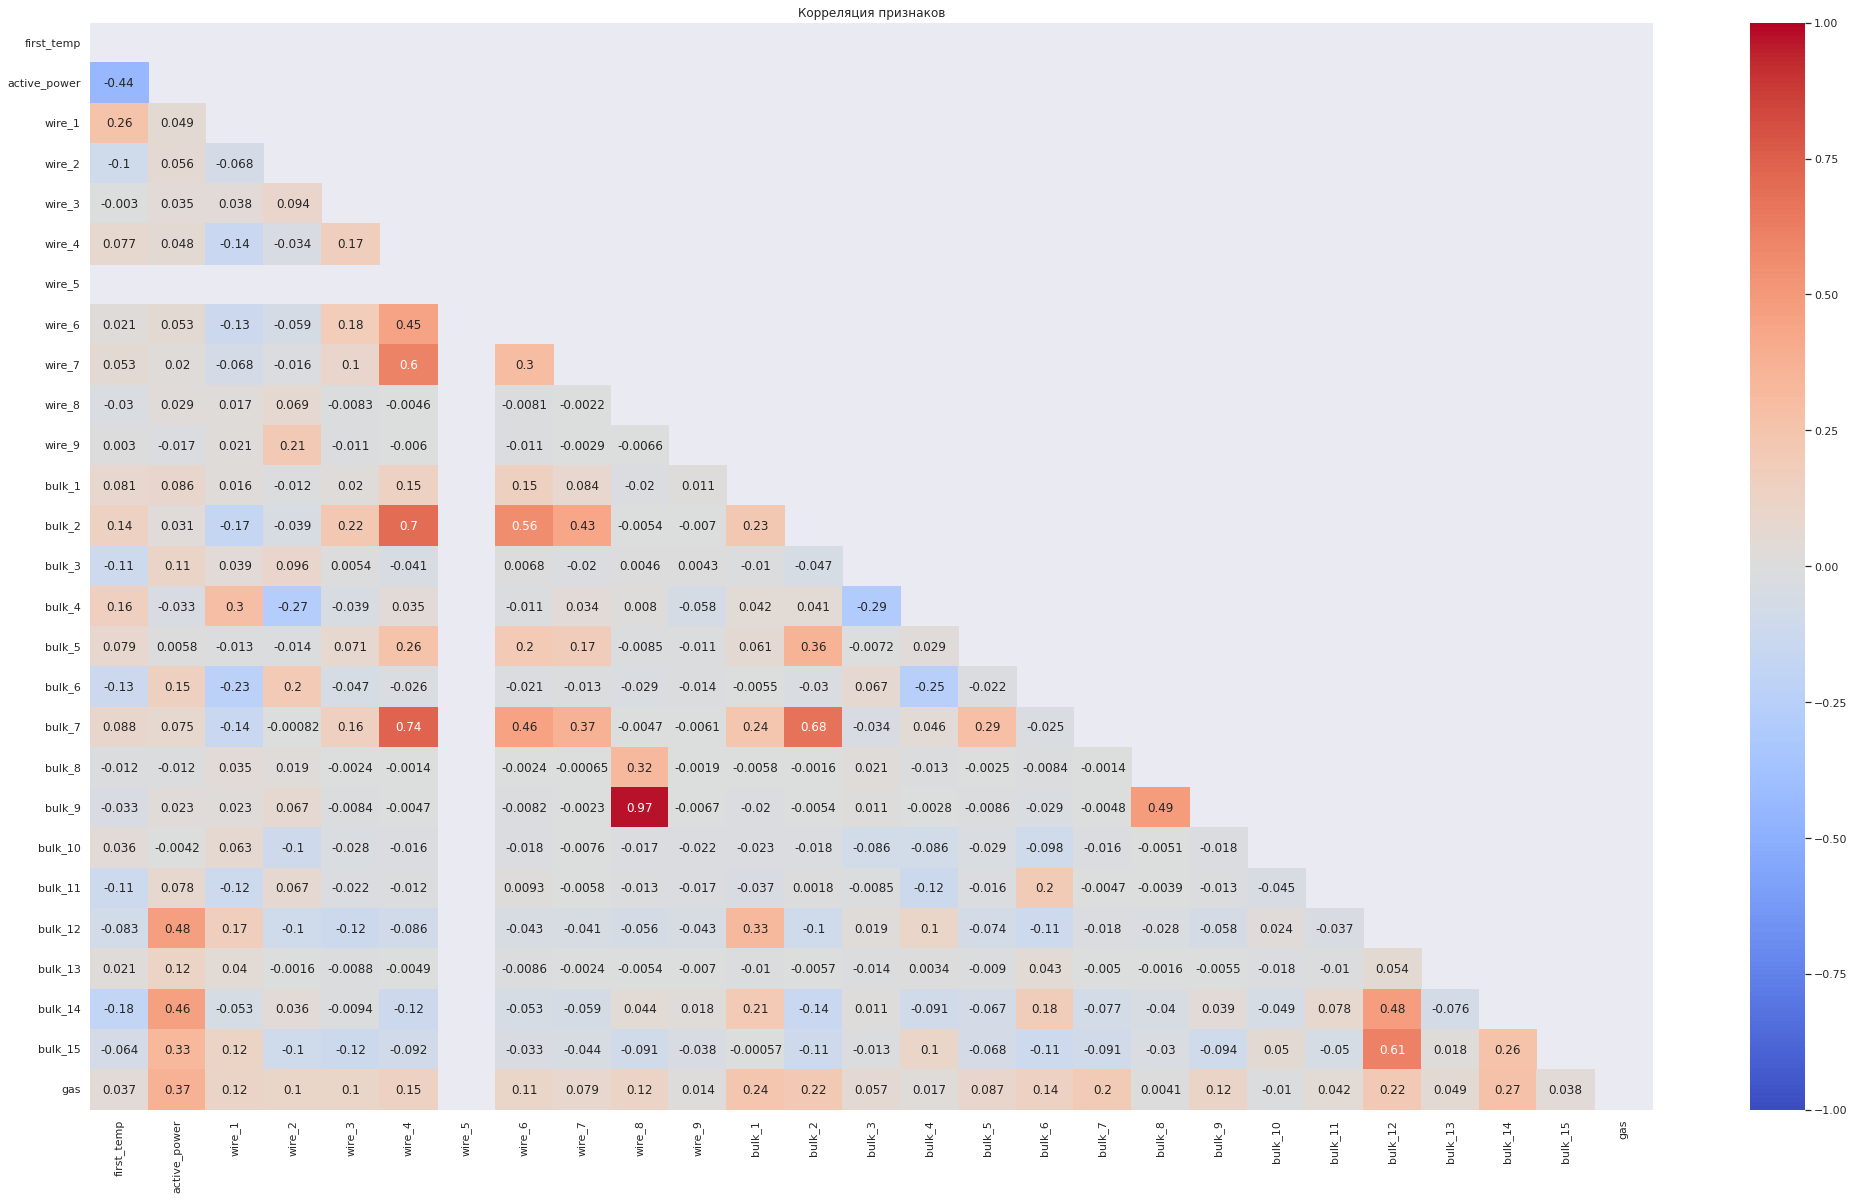

In [ ]:
#выделим значения для сокрытия их в тепловой карте
upp_mat = np.triu(features.corr())
#построение тепловой карты корреляции признаков
sns.set(rc = {'figure.figsize':(35,20)})
sns.heatmap(features.corr(),vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)
plt.title("Корреляция признаков")
plt.show()

Выделим признаки для удаления.

In [ ]:
#Создание матрицы корреляции
corr_matrix = features.corr().abs()

#выбор верхнего угла матрицы корреляции
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#определение столбцов с корреляцией
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
За отсечку берём уровень 0.9. Ещё такой момент можно вспомнить: если данные ненормально распределены, то используем корреляцию Спирмена. Если нормально - корреляцию Пирсона.

![image.png](attachment:image.png)

<div class="alert alert-info"> <b>Комментарий студента: </b> 
Исправил.</div>

Создадим новую таблицу без мультиколлинеарности. А также удалим пустые столбцы.

In [ ]:
#новые признаки 
features_corr = features.drop(to_drop, axis =1)
features_corr.drop(['wire_5','wire_7'], inplace = True, axis = 1)

Проверим корелляцию в новой таблице

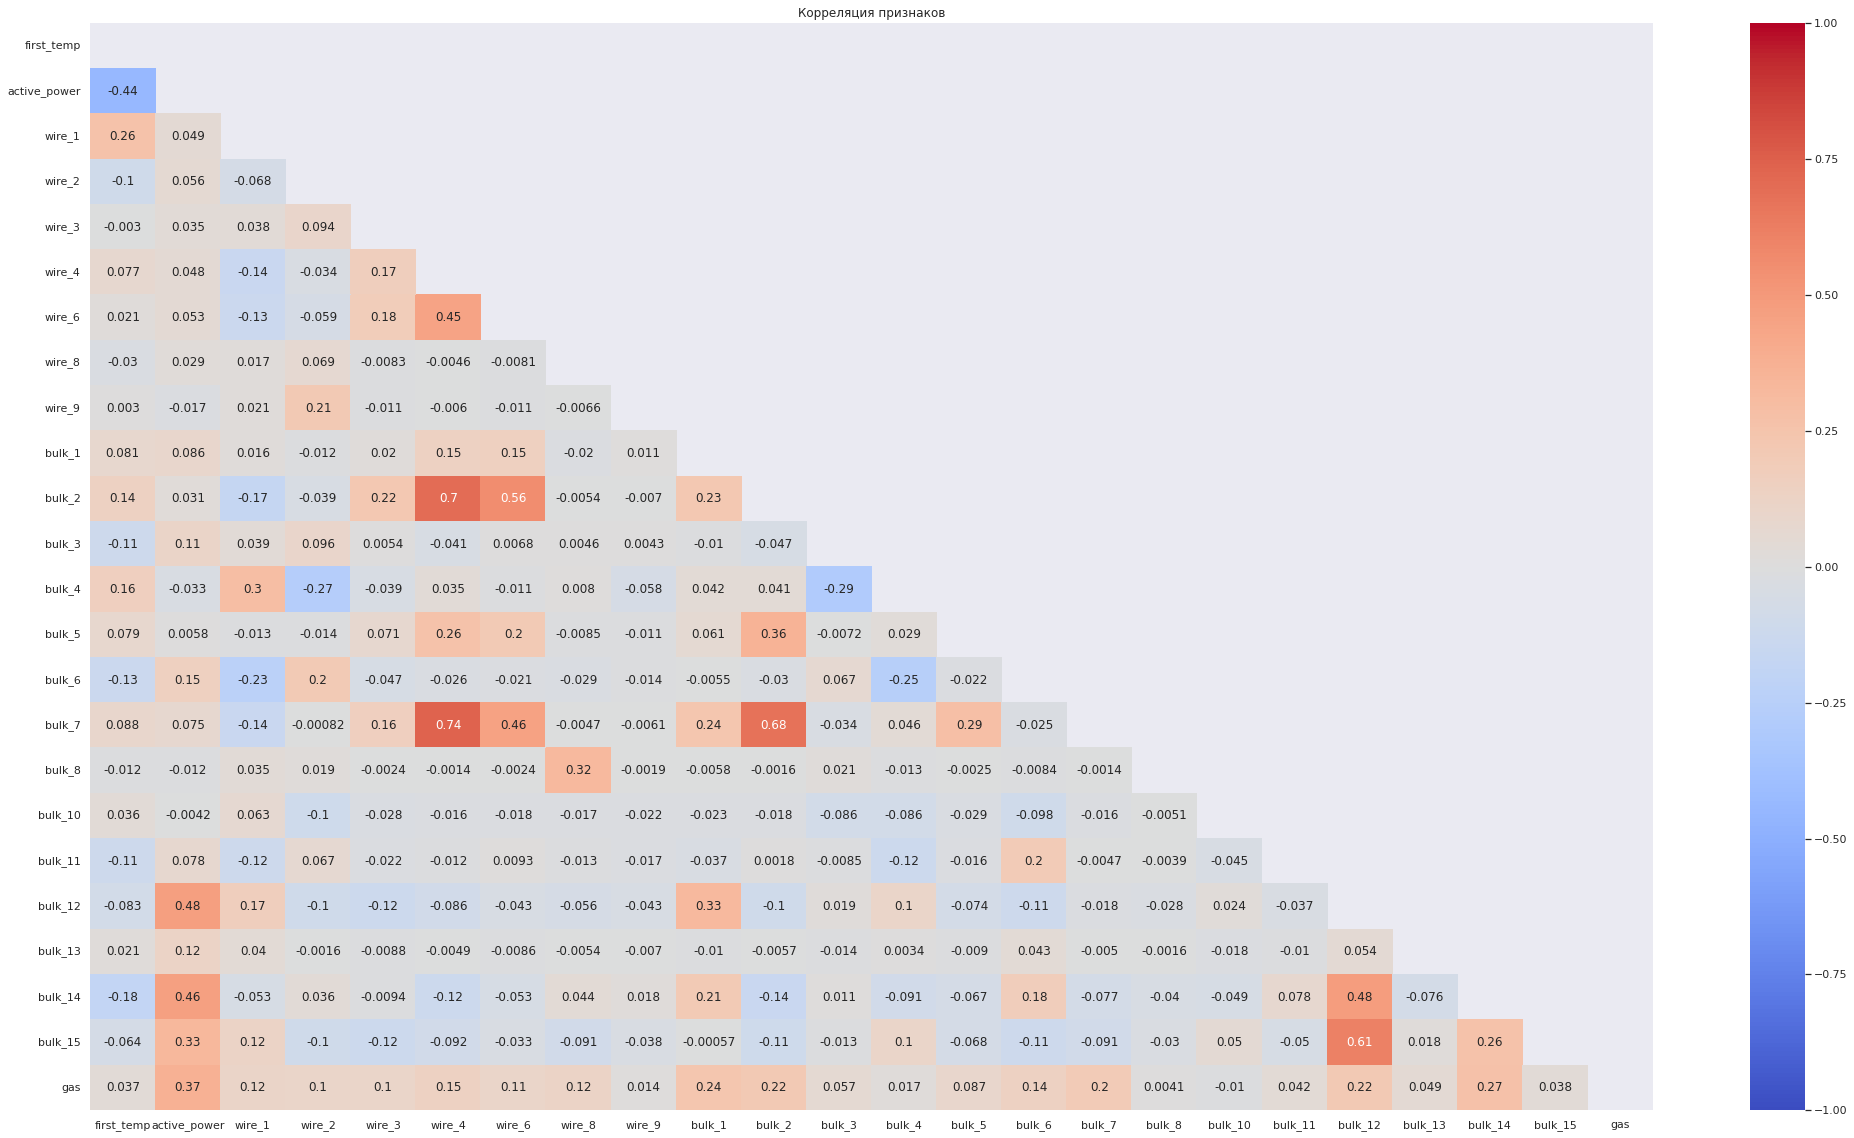

In [ ]:
#выделим значения для сокрытия их в тепловой карте
upp_mat = np.triu(features_corr.corr())
#построение тепловой карты корреляции признаков
sns.set(rc = {'figure.figsize':(35,20)})
sns.heatmap(features_corr.corr(),vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)
plt.title("Корреляция признаков")
plt.show()

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>ВОТ отличный пример на ложную корреляцию!!!!. На самом то деле корреляция между активной и реактивной - ооочень высокая. Но сейчас она не видна из-за наличия супервыброса d htfrnbdyjq vjoyjxnb!!!!!. И уже сделан ложный управленческий вывод... перед нахождением корреляции обязательно надо поработать вот с такими выбросами. <br>
    
Реактивную - стоит удалить из модели.
</p>
</div>

<div class="alert alert-info"> <b>Комментарий студента: </b> 
Исправил. Сразу не включал её в таблицу</div>

Разделим признаки на выборки

In [ ]:
#разделение признаков
features_train,features_test, target_train, target_test = train_test_split(features_corr,
                                                                           target,
                                                                           test_size = 0.2,
                                                                           random_state = 12092022)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p> ОК.

 #### Модель

Приступим к поиску лучшей модели.  
Поиск лучшей модели будет происходить с помощью кросс-валидации.

In [ ]:
#настройка параметров кросс валидации
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

Обучим модели и выведем результаты

In [ ]:
#модель XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror')

param_xgbr = {
        'n_estimators':range(50,200,4),
        'max_depth':range(2,20,1),
        'learning_rate':np.linspace(0.001,2,20),
        'subsample':np.linspace(0.3,0.9,20),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,9,1)
        }


rs_xgbr = RandomizedSearchCV(xgbr,
                             param_xgbr,
                             cv = cv,
                             scoring = 'neg_mean_absolute_error',
                             n_jobs = -1)
 
#тренировка на тренировочном наборе
rs_xgbr.fit(features_train,target_train)

#параметры
best_estimator = rs_xgbr.best_estimator_
print(best_estimator)

#точность оптимального трейнера
print("XGBoost")
print(abs(rs_xgbr.best_score_))


XGBRegressor(colsample_bytree=0.8733333333333333,
             learning_rate=0.10621052631578948, max_depth=19,
             min_child_weight=6, n_estimators=178, objective='reg:squarederror',
             subsample=0.868421052631579)
XGBoost
6.261920524797164


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>первый пошёл)

In [ ]:
#модель LightGBM
lgbm = LGBMRegressor(random_state =12092022, boosting_type = 'gbdt')

param_lgbm = {
    'num_leaves': range(50,200,10),
    'max_depth' : range(2,20,1),
    'learning_rate':np.linspace(0.001,2,20),
    'subsample':np.linspace(0.3,0.9,20),
    'colsample_bytree':np.linspace(0.5,0.98,10)
    }

rs_lgbm = RandomizedSearchCV(lgbm,
                             param_lgbm,
                             cv = cv,
                             scoring = 'neg_mean_absolute_error', 
                             n_jobs = -1)
 
#тренировка на тренировочном наборе
rs_lgbm.fit(features_train,target_train)

#лучшие параметры
best_estimator = rs_lgbm.best_estimator_
print(best_estimator)

#точность оптимального трейнера
print("LightGBM")
print(abs(rs_lgbm.best_score_))

LGBMRegressor(colsample_bytree=0.7133333333333334,
              learning_rate=0.4218421052631579, max_depth=2, num_leaves=130,
              random_state=12092022, subsample=0.4578947368421053)
LightGBM
6.350828670562046


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>параметры-контсанты стараются сразу в моедль вставлять.

In [ ]:
#модель случайного леса
model_rf = RandomForestRegressor(random_state = 12092022)

params = [{"n_estimators": range(10,101,10),
      "max_depth": range(1,16,2)}]
rs_rf = RandomizedSearchCV(model_rf,
                           params,
                           scoring='neg_mean_absolute_error',
                           cv=cv,
                           n_jobs = -1)

#тренировка на тренировочном наборе
rs_rf.fit(features_train,target_train)

#лучшие параметры
best_estimator = rs_rf.best_estimator_
print(best_estimator)

#точность оптимального трейнера
print("RandomForestRegressor")
print(abs(rs_rf.best_score_))


RandomForestRegressor(max_depth=11, n_estimators=80, random_state=12092022)
RandomForestRegressor
6.120668582721048


In [ ]:
# модель CatBoost
ctb_model = CatBoostRegressor(n_estimators=300, loss_function='MAE')

grid = {'learning_rate': [0.001, 0.05, 1],
        'depth': [2, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

ctb_model.randomized_search(grid,
                            cv = cv,
                            X=features_train,
                            y=target_train)
#тренировка на тренировочном наборе
ctb_model.fit(features_train, target_train)

#лучшие параметры
print(ctb_model.get_params())

# Вывод точности трейнера
print("CatBoostRegressor")
ctb_model.get_best_score()

Выходные данные были обрезаны до нескольких последних строк (5000).
181:	learn: 6.1111799	test: 6.0946571	best: 6.0946571 (181)	total: 210ms	remaining: 136ms
182:	learn: 6.1043045	test: 6.0844568	best: 6.0844568 (182)	total: 211ms	remaining: 135ms
183:	learn: 6.0960049	test: 6.0706610	best: 6.0706610 (183)	total: 212ms	remaining: 134ms
184:	learn: 6.0903470	test: 6.0648159	best: 6.0648159 (184)	total: 214ms	remaining: 133ms
185:	learn: 6.0828684	test: 6.0591324	best: 6.0591324 (185)	total: 215ms	remaining: 132ms
186:	learn: 6.0773829	test: 6.0582875	best: 6.0582875 (186)	total: 216ms	remaining: 130ms
187:	learn: 6.0717436	test: 6.0574928	best: 6.0574928 (187)	total: 217ms	remaining: 129ms
188:	learn: 6.0661839	test: 6.0560497	best: 6.0560497 (188)	total: 218ms	remaining: 128ms
189:	learn: 6.0605901	test: 6.0489724	best: 6.0489724 (189)	total: 219ms	remaining: 127ms
190:	learn: 6.0516162	test: 6.0431273	best: 6.0431273 (190)	total: 221ms	remaining: 126ms
191:	learn: 6.0464925	test: 6.05

{'learn': {'MAE': 5.541005345153167}}

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>Тут хорошо бы таблицу-резюме по всем моделям. Это позволит в едином формате видеть принимаемое решение.<br><br>
    
И верно - дальше только лучшая модель.

<div class="alert alert-info"> <b>Комментарий студента: </b> 
Вот тут уточни пожалуйста, что конкретно должно быть?  
Я правильно понимаю что нужна таблица спредиктами и реальными показателями?  Или нужна диаграмма(ниже)? или просто провести сравнение моделей.  
Я думал мы эти результаты в отчёте пишем. Я если что допишу.</div>

In [ ]:
"""
fig = go.Figure()
fig.add_trace(go.Scatter(y = target_test,  name = "Реальные",  mode='lines',))
fig.add_trace(go.Scatter(y = predictions,  name = "Предсказанные", mode='lines',))
fig.show()
"""

'\nfig = go.Figure()\nfig.add_trace(go.Scatter(y = target_test,  name = "Реальные",  mode=\'lines\',))\nfig.add_trace(go.Scatter(y = predictions,  name = "Предсказанные", mode=\'lines\',))\nfig.show()\n'

## тестирование лучшей

Мы видим что модель CatBoostRegressor показала наилучший результат на тренировочной модели.  
Проверим значение метрики MAE на тестовой выборке.


In [ ]:
#подсчет MAE и вывод на экран
predictions = ctb_model.predict(features_test)
print('CatBoost test MAE:')
print(mean_absolute_error(predictions, target_test))

CatBoost test MAE:
5.963638806139729


Определим важность признаков в процессе обучении модели CatBoost.

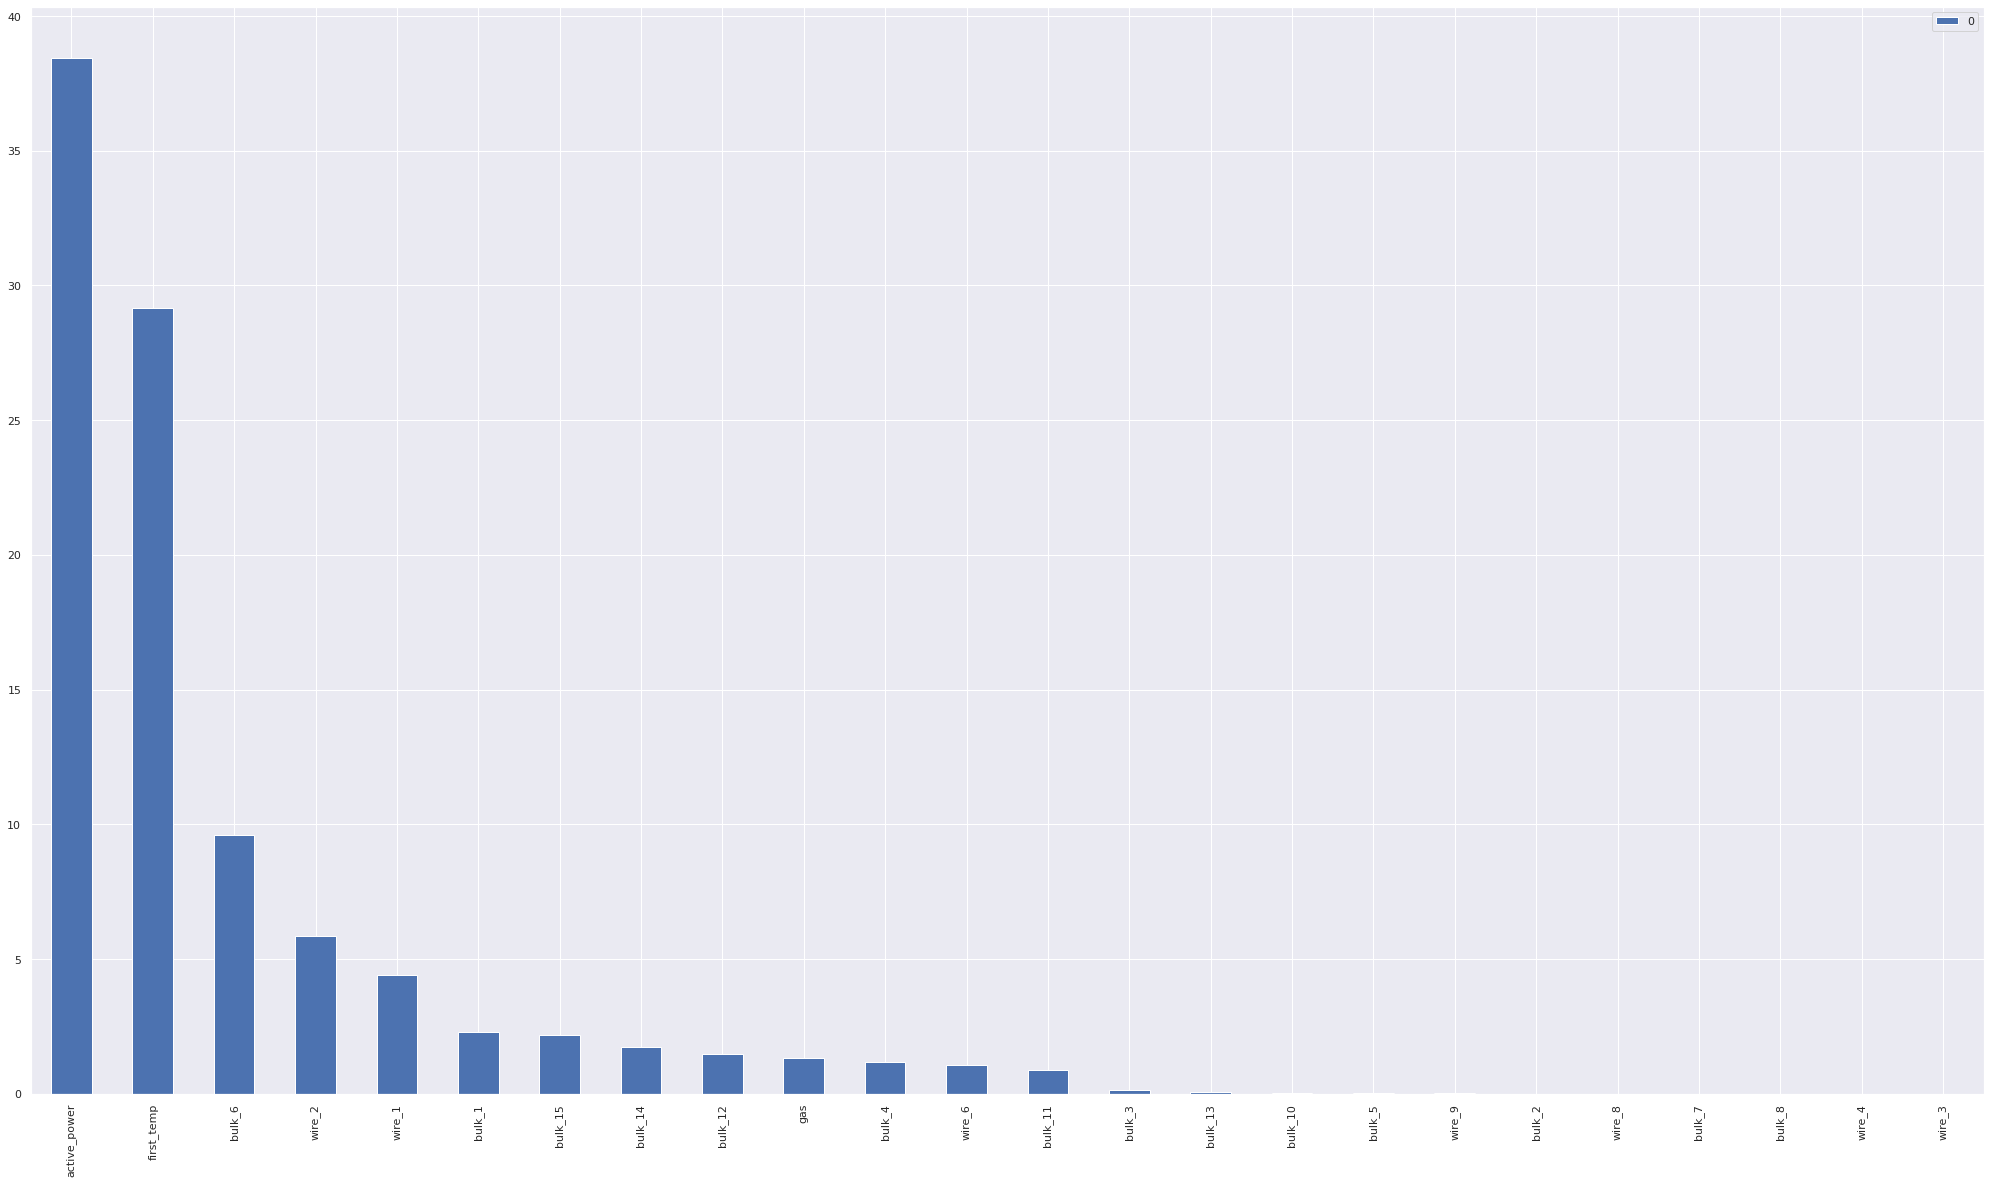

In [ ]:
#диограмма важности признаков
feature_importance = pd.Series(ctb_model.feature_importances_, index=features_train.columns).sort_values(ascending=False).to_frame()
feature_importance.plot(kind = 'bar',)

<div class="alert alert-info"> <b>Комментарий студента: </b> 
Спасибо что проверяешь мой проект! Я учел все твои замечания. Также оставил признаки с болишинством нулей и в итоге суммировал мощность. Это помогло улучшить метрику. </div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
ОК, Иван, ещё один уверненный шаг к финалу этой истории!<br>
Обработка данных, размышления над факторами, многогранная интересная модельная работа!!!!, конечные результаты, графика - многое удалось как надо. Можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.<br> 
 
Всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
Это было отступление)<br>   
Что касается проекта: я там остаавил по корреляции и выбросм комментарии. Это как раз то, что ты спрашивал, видимо. Будет хорошо, если отработаешь их.<br>    
Однозначно видно, что ты технически сделал хорошую работу.<br>
Осталось не так много. Да и времени ещё точно хватает)<br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.